# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global Variables

In [2]:
data_train_path = 'mnist_train.csv'
data_test_path = 'mnist_test.csv'

# Load File

In [3]:
df_train = pd.read_csv(data_train_path)
df_test = pd.read_csv(data_test_path)

In [4]:
print(df_train.shape)
print(df_train)
data_train = df_train.to_numpy()
len_data_train = len(data_train)

(60000, 785)
       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23

In [5]:
# print(df_train['label'][0])
# arr = np.array(df_train)
# print(arr)
# print(arr.shape)
# print(data_train)
lst = [(1, 2), (2, 3), (5, 6), (3, 4)]
lst = sorted(lst, key=lambda x: x[1])

lst2 = np.array([0, 1, 2, 3, 4, 5, 6, 10, 8, 9])
print(np.argmax(lst2))

7


In [6]:
print(df_test.shape)
print(df_test)
data_test = df_test.to_numpy()
len_data_test = len(data_test)

(10000, 785)
      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0         7    0    0    0    0    0    0    0    0    0  ...      0      0   
1         2    0    0    0    0    0    0    0    0    0  ...      0      0   
2         1    0    0    0    0    0    0    0    0    0  ...      0      0   
3         0    0    0    0    0    0    0    0    0    0  ...      0      0   
4         4    0    0    0    0    0    0    0    0    0  ...      0      0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   
9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   
9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   
9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   

      28x21  28x22  28x23  28x24  28x2

# Functions

Tính khoảng cách euclid giữa 2 điểm bất kì

In [7]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum(np.power(np.subtract(x1, x2), 2)))

Trả về list K lân cận gần nhất so với điểm test đang xét



In [8]:
def get_k_nearest_neighbors(test, k):
    k_nearest_neighbors = [(data_train[idx][0], euclidean_distance(test, data_train[idx][1:])) for idx in range(k)]
    k_nearest_neighbors = sorted(k_nearest_neighbors, key=lambda x: x[1])
    for idx in range(k, len_data_train):
        distance = euclidean_distance(test, data_train[idx][1:])
        if distance < k_nearest_neighbors[0][1]:
            k_nearest_neighbors[0] = (data_train[idx][0], distance)
            k_nearest_neighbors = sorted(k_nearest_neighbors, key=lambda x: x[0])

    return k_nearest_neighbors

Dự đoán dựa trên list K lân cận gần nhất

In [9]:
def predict(k_nearest_neighbors):
    distances = np.zeros(10)
    for (label, distance) in k_nearest_neighbors:
        distances[label] += 1/distance

    return np.argmax(distances)

Trả về độ chính xác của quá trình dự đoán

In [10]:
def evaluate_accuracy(test_label, predictions):
    test_label = np.array(test_label)
    predictions = np.array(predictions)
    correct = 0

    same = np.where(test_label == predictions, 1, 0)
    return np.sum(same) / len(same) *100

# Solve

Chọn đoạn data từ tập test

In [11]:
begin = 0
end = 10

Thực hiện dự đoán và in ra độ chính xác

In [12]:
predictions = []
for test in data_test[begin:end, :]:
    k_nearest_neighbors = get_k_nearest_neighbors(test[1:], 5)
    predictions.append(predict(k_nearest_neighbors))

accuracy = evaluate_accuracy(data_test[begin:end, 0], predictions)
print("Accuracy: " + str(accuracy) + "%")

Accuracy: 70.0%


# Bonus

In [14]:
import cv2

Tự tạo ra 1 ảnh số 9 và in ra dự đoán

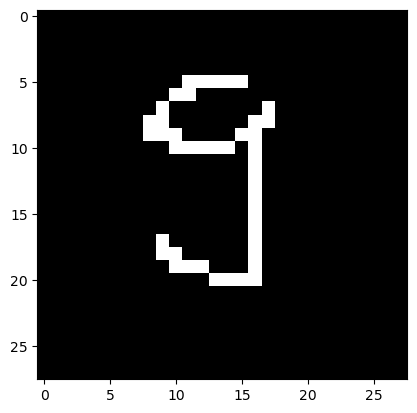

Prediction: 9


In [15]:
img = cv2.imread('9.png', 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (28, 28))

plt.imshow(img, cmap='gray')
plt.show()

img = img.reshape(28*28)
k_nearest_neighbors = get_k_nearest_neighbors(img, 8)
prediction = predict(k_nearest_neighbors)
print("Prediction: " + str(prediction))